In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [3]:
dataset = pd.read_csv("datasets/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [5]:
y = y.reshape(len(y),1)

In [26]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [27]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [28]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [35]:
# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
sc_y.inverse_transform(regressor.predict(X).reshape(-1,1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

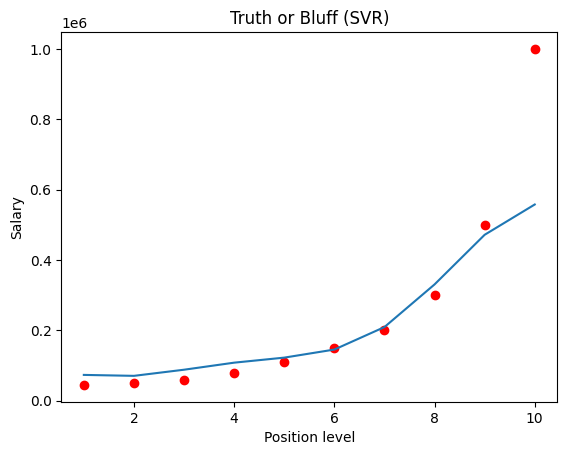

In [41]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='r')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()